In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [40]:
methods = ['KMeans', 'KModes', 'NMF', 'SNMF']
cluster_num = 13
fname = lambda mtd, num: 'ClusterData/ADHD_{:s}_keq{:g}.h5'.format(mtd, num)

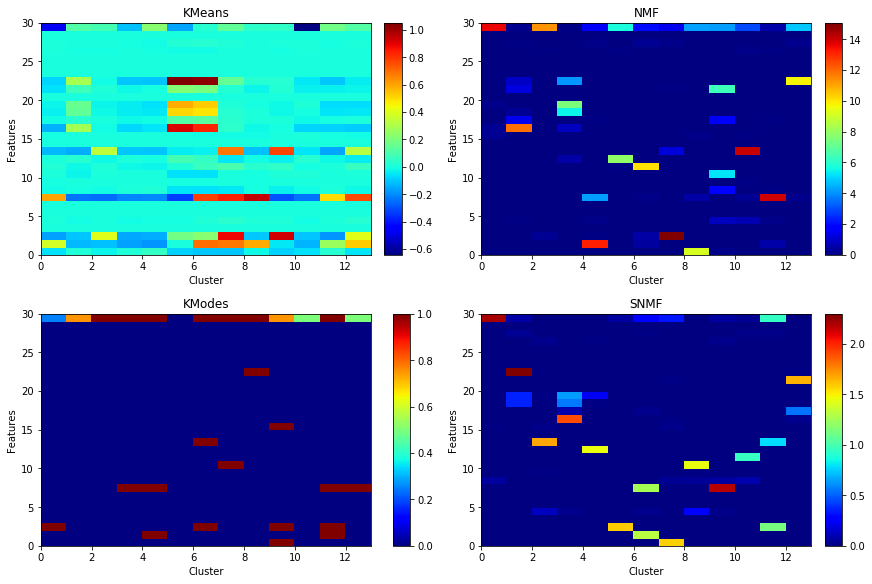

In [41]:
fig, ax = plt.subplots(2,2,figsize=(12,8), constrained_layout=True)
for i,mtd in enumerate(methods):
    with h5py.File(fname(mtd, cluster_num), 'r') as F:
        cfw = F['weights'][()]
    
    if cfw.shape[1] != cluster_num: cfw = cfw.T
        
    row = i % 2
    col = i // 2
    
    #if mtd != 'KModes':
    #    cax = ax[row][col].pcolormesh(((cfw.T-cfw.mean(axis=1))/cfw.std(axis=1)).T, cmap='jet')
    #else:
    cax = ax[row][col].pcolormesh(cfw, cmap='jet')
    
    plt.colorbar(cax, ax=ax[row][col])
    ax[row][col].set_title(mtd)
    ax[row][col].set_xlabel('Cluster')
    ax[row][col].set_ylabel('Features')

Text(0.5, 0, 'Cluster')

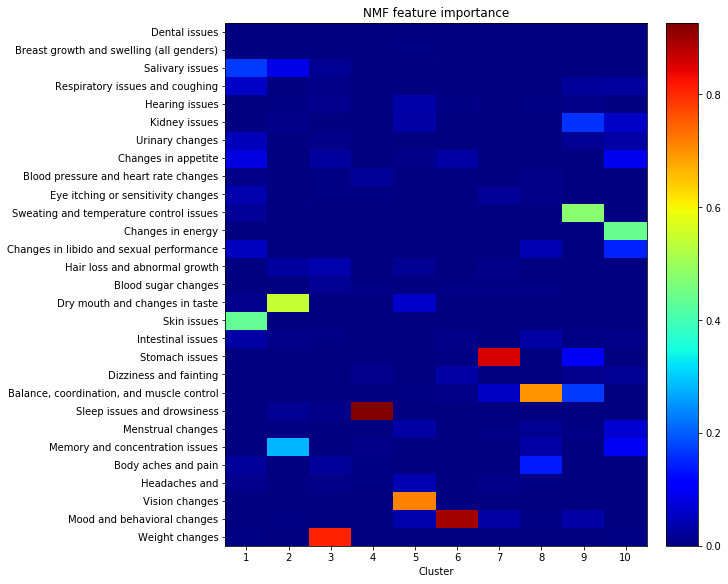

In [118]:
clusters = ['Weight changes', 
            'Mood and behavioral changes', 
            'Vision changes',
            'Headaches and',
            'Body aches and pain',
            'Memory and concentration issues',
            'Menstrual changes',
            'Sleep issues and drowsiness',
            'Balance, coordination, and muscle control',
            'Dizziness and fainting',
            'Stomach issues',
            'Intestinal issues',
            'Skin issues',
            'Dry mouth and changes in taste',
            'Blood sugar changes',
            'Hair loss and abnormal growth',
            'Changes in libido and sexual performance',
            'Changes in energy',
            'Sweating and temperature control issues',
            'Eye itching or sensitivity changes',
            'Blood pressure and heart rate changes',
            'Changes in appetite',
            'Urinary changes',
            'Kidney issues',
            'Hearing issues',
            'Respiratory issues and coughing',
            'Salivary issues',
            'Breast growth and swelling (all genders)',
            'Dental issues',
            'Effectiveness'
            ]

fig, ax = plt.subplots(1,figsize=(10,8), constrained_layout=True)
mtd = 'NMF'
cluster_num=10
fname = lambda mtd, num: 'ClusterData/Bipolar-Disorder_{:s}_keq{:g}.h5'.format(mtd, num)
with h5py.File(fname(mtd, cluster_num), 'r') as F:
    clusters2 = F['labels'][()]
    cfw = F['weights'][()]
    
cax = ax.pcolormesh(cfw / cfw.sum(axis=0), cmap='jet')
plt.yticks(np.arange(0.5,29,1), clusters)
plt.xticks(np.arange(0.5,cluster_num,1), np.arange(1,cluster_num+1))
    
plt.colorbar(cax, ax=ax)
ax.set_title(mtd + ' feature importance')
ax.set_xlabel('Cluster')


Text(0.5, 0, 'Cluster')

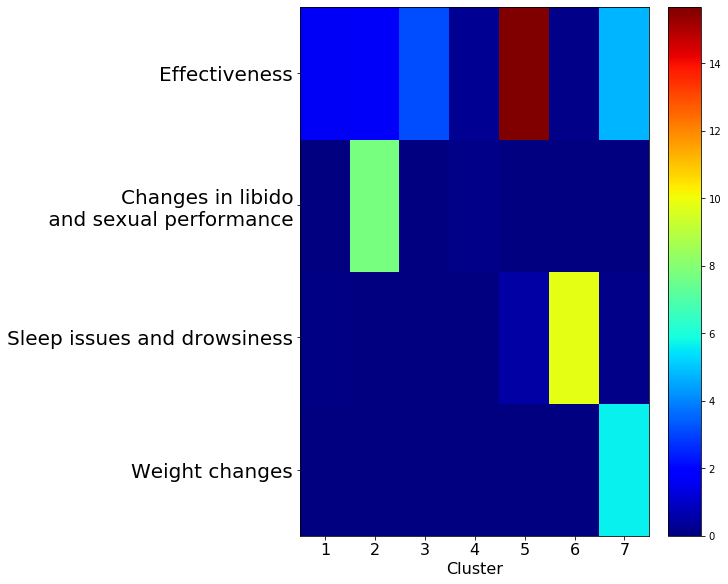

In [63]:
clusters_picked = ['Weight changes', 
                'Sleep issues and drowsiness',
                'Changes in libido and sexual performance',
                'Effectiveness'
                ]

clusters_picked2 = ['Weight changes', 
                'Sleep issues and drowsiness',
                'Changes in libido\n and sexual performance',
                'Effectiveness'
                ]


inds = [clusters.index(c) for c in clusters_picked]

fig, ax = plt.subplots(1,figsize=(10,8), constrained_layout=True)
mtd = 'NMF'
cluster_num=7
with h5py.File(fname(mtd, cluster_num), 'r') as F:
    cfw = F['weights'][()]
    
cax = ax.pcolormesh(cfw[np.array(inds)], cmap='jet')
plt.yticks(np.arange(0.5,4,1), clusters_picked2, fontsize=20)
plt.xticks(np.arange(0.5,7,1), np.arange(1,9), fontsize=16)
    
plt.colorbar(cax, ax=ax)
#ax.set_title(mtd + ' feature importance')
ax.set_xlabel('Cluster', fontsize=16)


In [120]:
import glob
import pandas as pd
condition = 'Bipolar-Disorder'

# Reading in the massive processed dataframe                                                     
ConditionFile = glob.glob('UniqueMedications/*{:s}*csv'.format(condition))[0]
condDF = pd.read_csv(ConditionFile, sep='$', usecols=[1])
condMeds = [med.strip() for med in list(condDF['Medication'])]


dataframe = pd.read_csv('Final_processed_reviews/{:s}_processed.csv'.format(condition),
                        sep='$', index_col=0)

# Identifying the medication columns and mapping back into a list of medications                 
med_columns = list(condMeds)
medsDF = dataframe.drop(columns=[col for col in dataframe.columns if col not in med_columns])
medications = []
for ind in medsDF.index:
    for col in medsDF:
        if medsDF.loc[ind][col]:
            medications.append(str(col))
medications = np.array(medications)

# Finding the RBO between that list and that from each cluster from each technique               
methods = ['NMF']#, 'SNMF']
scores = []
k = 10
for mtd in methods:
    fname = 'ClusterData/{:s}_{:s}_keq{:g}.h5'.format(condition, mtd, k)
    with h5py.File(fname,'r') as F:
        clusters = F['labels'][()]
        cfw = F['weights'][()].T
        if cfw.shape[0] == k:
            cfw = cfw.T
            

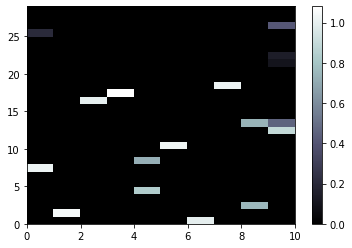

In [107]:
plt.pcolormesh(np.log10(cfw), cmap='bone', vmin=0)
plt.colorbar()

In [122]:
for cluster in np.unique(clusters):
    inds = np.where(clusters[0]==cluster)[0]
    rep = []
    for med in np.unique(medications):
        total = (medications==med).sum()
        rep.append((medications[inds]==med).sum()/total)
        if med == 'Depakote':
            import pdb
            pdb.set_trace()
    if cluster == 0:
        print('Cluster\t{:s}\n'.format('\t'.join([med for med in np.unique(medications)])))
    print('{:g}\t{:s}'.format(cluster, '\t'.join([str(r.round(3)) for r in rep])))

> <ipython-input-122-5e6d4ce39ac8>(4)<module>()
-> for med in np.unique(medications):
(Pdb) rep
[0.16216216216216217, 0.0]
(Pdb) c
Cluster	Depakene	Depakote	Eskalith	Lamictal	Sarafem	Seroquel	Tegretol	Zyprexa

0	0.162	0.0	0.121	0.121	0.0	0.047	0.125	0.0
> <ipython-input-122-5e6d4ce39ac8>(4)<module>()
-> for med in np.unique(medications):
(Pdb) rep
[0.10810810810810811, 0.0]
(Pdb) medications[inds]==med
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,

BdbQuit: 

In [100]:
df = pd.read_csv('Depression_exploringfeatures.csv', sep='$', index_col=0)
df=df.drop(columns='Effectiveness')

In [101]:
df.drop(index=[ind for ind in df.index if df.loc[ind].sum()==0])

,Weight changes,Mood and behavioral changes,Vision changes,Headaches,Body aches and pain,Memory and concentration issues,Menstrual changes,Sleep issues and drowsiness,"Balance, coordination, and muscle control",Dizziness and fainting,...,Eye itching or sensitivity changes,Blood pressure and heart rate changes,Changes in appetite,Urinary changes,Kidney issues,Hearing issues,Respiratory issues and coughing,Salivary issues,Breast growth and swelling (all genders),Dental issues
2,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13095,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
13096,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13097,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13098,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


(10,)